In [1]:
import nltk
import urllib.request
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

### Scraping

In [2]:
#obtener el contenido HTML de la pagina web 
res = urllib.request.urlopen("https://www.ionos.es/digitalguide/paginas-web/desarrollo-web/que-es-el-web-scraping/")
html = res.read()
soup = BeautifulSoup(html,"html.parser")
text = soup.get_text(strip=True)

### TOKENIZAR

- Frecuencia de palabras

In [3]:
def frecuenciaPalabras(tokens):
    freq = nltk.FreqDist(tokens)
    for palabra,valor in freq.items():
        print(f"{palabra}: {valor}")
    return freq

In [4]:
def vizualizarTokens(tokens):
    tokens.plot(30,cumulative=False)

In [5]:
#extraer tokens
tokens = word_tokenize(text,"spanish")

In [6]:
# tokens

In [7]:
# tokens = [word.lower() for word in tokens if word.isalpha() and len(word) > 1 ]
tokens = [word.lower() for word in tokens if word.isalpha()]

In [8]:
# freq = frecuenciaPalabras(tokens)

In [9]:
# vizualizarTokens(freq)

### ELIMINAR PALABRAS DE PARADA

In [10]:
Tokens_limpios = tokens[:]

for token in tokens:
    if token in stopwords.words("spanish"):
        Tokens_limpios.remove(token)

In [11]:
 len(Tokens_limpios)

947

In [12]:
frecuencia_limpia = frecuenciaPalabras(Tokens_limpios)

web: 45
scraping: 21
utiliza: 9
técnica: 1
ionosdigital: 1
guidepáginas: 1
webcreación: 1
páginas: 10
webdiseño: 1
webdesarrollo: 2
webderecho: 1
digitalhostingcmsblogscuestiones: 1
técnicasservidoresknow: 1
howconfiguraciónseguridadherramientasdominiosextensiones: 1
dominiogestión: 1
dominiosnoticias: 1
dominosconsejos: 1
dominiosonline: 1
marketingvender: 1
internetmarketing: 1
motores: 2
búsquedaredes: 1
socialesanálisis: 1
webcorreo: 1
marketingseguridad: 1
correo: 6
electrónicocuestiones: 1
técnicasproductos: 1
ionosdominiosdominios: 2
registra: 2
compra: 2
ahoranuevos: 2
nombres: 2
dominiostransferencia: 1
dominiosregistro: 1
dominio: 5
privadoinformación: 1
whoisdomain: 1
checkdominio: 1
gratiscorreo: 1
officedirección: 2
electrónicoservidoresservidor: 1
cloudservidores: 1
dedicadosservidores: 1
virtualesservidorescloud: 1
empresarialseguridadcertificado: 1
sslssl: 1
checkerpáginas: 1
hostingcrea: 2
página: 12
webplantillas: 1
webtiendas: 1
onlinehosting: 1
linuxwordpress: 1
hos

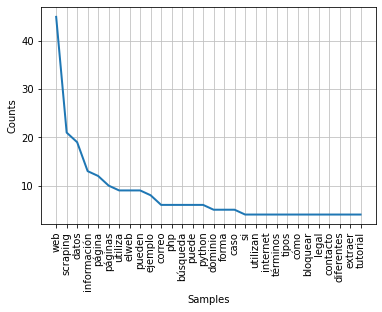

In [13]:
vizualizarTokens(frecuencia_limpia)

### DEFINICION Y EJEMPLO DE PALABRAS CON WORDNET

In [14]:
# from nltk.corpus import wordnet #importa la base de datos wordnet
# syn = wordnet.synsets("hot")

# print(syn[0].definition())
# print(syn[0].examples())

### SINONIMOS

In [15]:
# # Ejemplo con la palabra "investment"
# from nltk.corpus import wordnet

# sinonimos = []

# for syn in wordnet.synsets('investment'):#dentro de wordnet para la palabra investment
#     for lemma in syn.lemmas():#extraer todos los lemas que contengan como sinonimo esa palabra
#         sinonimos.append(lemma.name())
# print(sinonimos)

In [16]:
# #reemplazar tokens sinonimos
# #en tokens_limpios recorremos cada palabra y la reemplazamos por la palabra indicada si coincide

# for ind, _ in enumerate(sinonimos):
#     sin_tokens_limpios = [word.replace(sinonimos[ind],"investment") for word in Tokens_limpios]

### Reemplazar sinonimos Manuelamente

In [17]:
# Tokens_limpios

In [18]:
# sinonimos = ["etiquetas"]

# for ind,sin in enumerate(sinonimos):
#     sin_tokens_limpios = [word.replace(sinonimos[ind],"cerveza") for word in Tokens_limpios]

In [19]:
# len(sin_tokens_limpios)

In [20]:
# freq = frecuenciaPalabras(sin_tokens_limpios)

In [21]:
# vizualizarTokens(freq)

### ANTONIMOS

In [22]:
# from nltk.corpus import wordnet

# antonyms = []

# for syn in wordnet.synsets('good'):#recorra wordnet buscando la palabra 
#     for l in syn.lemmas(): #asocie los lemas que tenga la palabra
  
#         if l.antonyms():# si la palabra tiene antonimo
#             antonyms.append(l.antonyms()[0].name())#almacenar el antonimo en el vector
# print(antonyms)

### DERIVACION REGRESIVA (WORD STEMMING ) := ENCONTRAR PALABRA RAIZ

In [23]:
# # algoritmo porter de derivacion regrsiva, el mas utilizado --> importar modulo porterstemmer
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer() # se crea un objeto de derivacion regresiva, stemmer
# print(stemmer.stem('working'))

# print(stemmer.stem('drinking'))

- PorterStemmer solo esta para palabras en ingles, para palabras en español se puede utilizar SnowballStemmer

In [24]:
# from nltk.stem import SnowballStemmer
# print(SnowballStemmer.languages)

En español

In [25]:
# from nltk.stem import SnowballStemmer

# stemmer_español = SnowballStemmer("spanish")#crearmos una instancia de l Snowballstemmer

# print(stemmer_español.stem("trabajando"))
# print(stemmer_español.stem("estudiando"))
# print(stemmer_español.stem("Farriar"))

Aplicar al ejemplo

In [26]:
stemmer_español = SnowballStemmer("spanish")

In [27]:
# Tokens_limpios

In [28]:
# sin_tokens_limpios_stems = [stemmer_español.stem(token) for token in Tokens_limpios]

In [29]:
# sin_tokens_limpios_stems

In [30]:
# freq_stems = frecuenciaPalabras(sin_tokens_limpios_stems)

In [31]:
# vizualizarTokens(freq_stems)

### LEMATIZAR PALABRAS

In [32]:


# lemmtizer = WordNetLemmatizer()

# print(lemmtizer.lemmatize("increases"))

In [33]:
# print(lemmtizer.lemmatize("working",pos="v"))
# #sustantivos de manera predeterminada, especificar 'v'  si se quieren los verbos

### LEMATIZAR EN ESPAÑOL . INTALAR SPACY Y PAQUETES DE IDIOMAS

In [34]:
# Utilizar solo los tokens limpios, no solo con las raices (paso alternativo)
#tenemos que darle todas los tokens que tenemos en un string -> juntar en una cadena 
#separador.join(sin_tokens_limpio)

import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()#instancia

sin_tokens_limpios_lem = []

separador = " "
cadena = (separador.join(Tokens_limpios))#string


In [35]:
# cadena

In [36]:
cadena2 = nlp(cadena)

for token in cadena2:
    print(token.text,token.lemma_,token.pos_)# token, lema, indicador
    sin_tokens_limpios_lem.append(token.lemma_)# le añadimos cada uno de los lemas a la lista

fácilmenteregistro fácilmenteregistro PROPN
dominio dominio PROPN
privadodominio privadodominio PROPN
privacidad privacidad PROPN
whois whois PROPN
incluido incluir ADJ
gratisdominio gratisdominio PROPN
gratisinformación gratisinformación NOUN
whoisbusca whoisbusca PROPN
información información NOUN
dominiodomain dominiodomain PROPN
checkseguridadcertificado checkseguridadcertificado ADJ
sslmáxima sslmáxima PROPN
seguridad seguridad PROPN
accesso accesso PROPN
httpsssl httpsssl PROPN
checkercomprueba checkercomprueba PROPN
gratis gratis PROPN
cifrado cifrar ADJ
httpspáginas httpspáginas ADJ
web web PROPN
hostingcrea hostingcrea ADJ
página página PROPN
webcrea webcrea PROPN
fácilmente fácilmente ADV
página página ADJ
web web PROPN
negocioplantillas negocioplantillas NOUN
webmúltiples webmúltiples NOUN
diseños diseño ADJ
gran gran ADJ
variedad variedad NOUN
plantillastiendas plantillastiendas ADJ
onlinecrea onlinecrea VERB
propia propio DET
tienda tender NOUN
online online ADJ
rápidament

In [37]:
freq_lem = frecuenciaPalabras(sin_tokens_limpios_lem)


web: 45
scraping: 21
utilizar: 16
técnico: 3
ionosdigital: 1
guidepáginas: 1
webcreación: 1
página: 22
webdiseño: 1
webdesarrollo: 2
webderecho: 1
digitalhostingcmsblogscuestiones: 1
técnicasservidoresknow: 1
howconfiguraciónseguridadherramientasdominiosextensiones: 1
dominiogestión: 1
dominiosnoticias: 1
dominosconsejos: 1
dominiosonline: 1
marketingvender: 1
internetmarketing: 1
motor: 3
búsquedaredes: 1
socialesanálisis: 1
webcorreo: 1
marketingseguridad: 1
correar: 6
electrónicocuestiones: 1
técnicasproductos: 1
ionosdominiosdominios: 2
registrar: 2
comprar: 2
ahoranuevos: 2
nombre: 2
dominiostransferencia: 1
dominiosregistro: 1
dominio: 5
privadoinformación: 1
whoisdomain: 1
checkdominio: 1
gratiscorreo: 1
officedirección: 2
electrónicoservidoresservidor: 1
cloudservidores: 1
dedicadosservidores: 1
virtualesservidorescloud: 1
empresarialseguridadcertificado: 1
sslssl: 1
checkerpáginas: 1
hostingcrea: 2
webplantillas: 1
webtiendas: 1
onlinehosting: 1
linuxwordpress: 1
hostingwindow

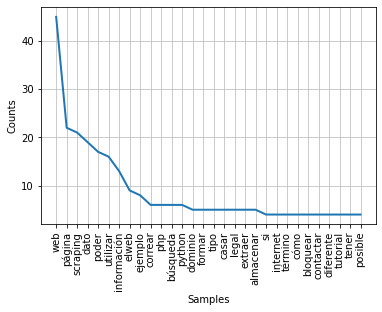

In [38]:
vizualizarTokens(freq_lem)

In [39]:
# def frecuenciaPalabras(tokens):
#     freq = nltk.FreqDist(tokens)
#     for palabra,valor in freq.items():
#         print(f"{palabra}: {valor}")
#     return freq

In [40]:
# for palabra,valor in freq_lem.items():
#     print(f"{palabra}: {valor}")

In [41]:
# import operator
# clients_sort = sorted(clients.items(), key=operator.itemgetter(1), reverse=True)
# for name in enumerate(clients_sort):
#     print(name[1][0], 'has spend', clients[name[1][0]])

In [42]:
# l = [f"{i}: {j}" for i,j in freq_lem.items()]

In [43]:
import operator
wordKeys = []
items_sort = sorted(freq_lem.items(), key=operator.itemgetter(1), reverse=True)
for name in enumerate(items_sort):
    print(name[1][0], '=', freq_lem[name[1][0]])
    wordKeys.append(name[1][0])


web = 45
página = 22
scraping = 21
dato = 19
poder = 17
utilizar = 16
información = 13
elweb = 9
ejemplo = 8
correar = 6
php = 6
búsqueda = 6
python = 6
dominio = 5
formar = 5
tipo = 5
casar = 5
legal = 5
extraer = 5
almacenar = 5
si = 4
internet = 4
término = 4
cómo = 4
bloquear = 4
contactar = 4
diferente = 4
tutorial = 4
tener = 4
posible = 4
sitio = 4
permitir = 4
técnico = 3
motor = 3
webanálisis = 3
ip = 3
gratis = 3
gran = 3
propio = 3
tender = 3
electrónico = 3
rendimiento = 3
artículo = 3
﻿1 = 3
crear = 3
funcionar = 3
fin = 3
mediar = 3
número = 3
leer = 3
cabo = 3
recurrir = 3
convertir = 3
cliente = 3
método = 3
utilización = 3
contar = 3
menudo = 3
producto = 3
tecnología = 3
comparación = 3
portal = 3
derecho = 3
operador = 3
existir = 3
lenguaje = 3
webdesarrollo = 2
ionosdominiosdominios = 2
registrar = 2
comprar = 2
ahoranuevos = 2
nombre = 2
officedirección = 2
hostingcrea = 2
servicio = 2
nuevo = 2
incluir = 2
variedad = 2
online = 2
elección = 2
profesional = 2
host

In [45]:
keys = wordKeys[:30]

In [46]:
keys

['web',
 'página',
 'scraping',
 'dato',
 'poder',
 'utilizar',
 'información',
 'elweb',
 'ejemplo',
 'correar',
 'php',
 'búsqueda',
 'python',
 'dominio',
 'formar',
 'tipo',
 'casar',
 'legal',
 'extraer',
 'almacenar',
 'si',
 'internet',
 'término',
 'cómo',
 'bloquear',
 'contactar',
 'diferente',
 'tutorial',
 'tener',
 'posible']

In [47]:
def searchByTag(tagName):
    Content = ''
    for tag in soup.find_all(tagName):
        if(len(tag.text) > 144):
            Content += tag.text+'\n\n'
    return Content

In [48]:
Content = searchByTag('p')
print(Content)

Los motores de búsqueda, como Google, utilizan desde hace tiempo los denominados rastreadores web o crawlers, que exploran Internet en busca de términos definidos por el usuario. Los rastreadores son tipos especiales de bots, que visitan una página web tras otra para generar asociaciones con términos de búsqueda y categorizarlos. El primer rastreador web se creó ya en 1993, cuando se presentó el primer motor de búsqueda: Jumpstation.

Entre estas técnicas de rastreo se incluye el web scraping o webharvesting. Te explicamos cómo funciona, para qué se utiliza y cómo se puede bloquear en caso necesario.

Durante el web scraping (del inglés scraping = arañar/raspar) se extraen y almacenan datos de páginas web para analizarlos o utilizarlos en otra parte. Por medio de este raspado web se almacenan diversos tipos de información: por ejemplo, datos de contacto, tales como direcciones de correo electrónico o números de teléfono, o también términos de búsqueda o URL. Estos se almacenan en bases

In [49]:
raw = Content.lower()

In [50]:
sent_tokens = nltk.sent_tokenize(raw) # convertir corpus a una lista de sentencias (tekenizar en sentencias)
word_tokens = nltk.word_tokenize(raw) # convertir corpus a una lista de palabras (tokenizar en palabras)

In [51]:
sent_tokens

['los motores de búsqueda, como google, utilizan desde hace tiempo los denominados rastreadores web o crawlers, que exploran internet en busca de términos definidos por el usuario.',
 'los rastreadores son tipos especiales de bots, que visitan una página web tras otra para generar asociaciones con términos de búsqueda y categorizarlos.',
 'el primer rastreador web se creó ya en 1993, cuando se presentó el primer motor de búsqueda: jumpstation.',
 'entre estas técnicas de rastreo se incluye el web scraping o webharvesting.',
 'te explicamos cómo funciona, para qué se utiliza y cómo se puede bloquear en caso necesario.',
 'durante el web scraping (del inglés scraping = arañar/raspar) se extraen y almacenan datos de páginas web para analizarlos o utilizarlos en otra parte.',
 'por medio de este raspado web se almacenan diversos tipos de información: por ejemplo, datos de contacto, tales como direcciones de correo electrónico o números de teléfono, o también términos de búsqueda o url.',
 

In [52]:
words = nltk.word_tokenize(sent_tokens[0])
words

['los',
 'motores',
 'de',
 'búsqueda',
 ',',
 'como',
 'google',
 ',',
 'utilizan',
 'desde',
 'hace',
 'tiempo',
 'los',
 'denominados',
 'rastreadores',
 'web',
 'o',
 'crawlers',
 ',',
 'que',
 'exploran',
 'internet',
 'en',
 'busca',
 'de',
 'términos',
 'definidos',
 'por',
 'el',
 'usuario',
 '.']

In [53]:
corpus = []
c = 0
for sent in sent_tokens:
    words = nltk.word_tokenize(sent)
    for w in words:
        if w in keys:
           
           c +=1
        if c > 1:
            corpus.append(sent)
            break
    c = 0


In [54]:
corpus

['los motores de búsqueda, como google, utilizan desde hace tiempo los denominados rastreadores web o crawlers, que exploran internet en busca de términos definidos por el usuario.',
 'los rastreadores son tipos especiales de bots, que visitan una página web tras otra para generar asociaciones con términos de búsqueda y categorizarlos.',
 'el primer rastreador web se creó ya en 1993, cuando se presentó el primer motor de búsqueda: jumpstation.',
 'entre estas técnicas de rastreo se incluye el web scraping o webharvesting.',
 'te explicamos cómo funciona, para qué se utiliza y cómo se puede bloquear en caso necesario.',
 'durante el web scraping (del inglés scraping = arañar/raspar) se extraen y almacenan datos de páginas web para analizarlos o utilizarlos en otra parte.',
 'por medio de este raspado web se almacenan diversos tipos de información: por ejemplo, datos de contacto, tales como direcciones de correo electrónico o números de teléfono, o también términos de búsqueda o url.',
 

In [55]:
len(corpus)

34

In [56]:
len(sent_tokens)

49

In [57]:
separador = " "
cadena = (separador.join(corpus))

In [58]:
cl = nltk.sent_tokenize(cadena)

In [59]:
cl

['los motores de búsqueda, como google, utilizan desde hace tiempo los denominados rastreadores web o crawlers, que exploran internet en busca de términos definidos por el usuario.',
 'los rastreadores son tipos especiales de bots, que visitan una página web tras otra para generar asociaciones con términos de búsqueda y categorizarlos.',
 'el primer rastreador web se creó ya en 1993, cuando se presentó el primer motor de búsqueda: jumpstation.',
 'entre estas técnicas de rastreo se incluye el web scraping o webharvesting.',
 'te explicamos cómo funciona, para qué se utiliza y cómo se puede bloquear en caso necesario.',
 'durante el web scraping (del inglés scraping = arañar/raspar) se extraen y almacenan datos de páginas web para analizarlos o utilizarlos en otra parte.',
 'por medio de este raspado web se almacenan diversos tipos de información: por ejemplo, datos de contacto, tales como direcciones de correo electrónico o números de teléfono, o también términos de búsqueda o url.',
 